In [32]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker as ticker

In [2]:
datapath = '/data/p-one/llallement/dimuon_generator/NuDimuonGenerator/h5_files/'

In [3]:
energy_nu_list = []
energy_mu1_list = []
energy_mu2_list = []
energy_h1_list = []
energy_h2_list = []

theta_mu1_list = []
phi_mu1_list = []
distance_mu1_list = []

theta_mu2_list = []
phi_mu2_list = []
distance_mu2_list = []

for i in range(1, 101):
    random_seed = 110000 + i
    filename = datapath + str(random_seed) + '_output.h5'

    with h5py.File(filename, 'r') as f:
        grp = f['EventParticleList']
        event_list = list(grp.keys())

        for event in event_list:
            data = np.array(grp[event])

            energy_nu_list.append(data[0][2])
            energy_mu1_list.append(data[1][2])
            energy_mu2_list.append(data[2][2])
            energy_h1_list.append(data[3][2])
            energy_h2_list.append(data[4][2])

            theta_mu1_list.append(data[1][3])
            phi_mu1_list.append(data[1][4])
            distance_mu1_list.append(data[1][5])

            theta_mu2_list.append(data[2][3])
            phi_mu2_list.append(data[2][4])
            distance_mu2_list.append(data[2][5])

energy_nu = np.array(energy_nu_list)
energy_mu1 = np.array(energy_mu1_list)
energy_mu2 = np.array(energy_mu2_list)
energy_h1 = np.array(energy_h1_list)
energy_h2 = np.array(energy_h2_list)

theta_mu1 = np.array(theta_mu1_list)
phi_mu1 = np.array(phi_mu1_list)
distance_mu1 = np.array(distance_mu1_list)

theta_mu2 = np.array(theta_mu2_list)
phi_mu2 = np.array(phi_mu2_list)
distance_mu2 = np.array(distance_mu2_list)

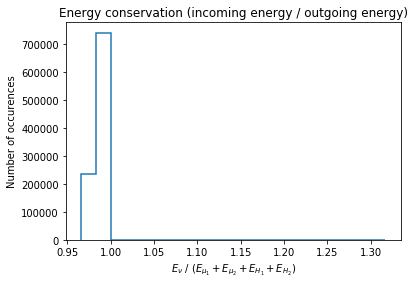

In [4]:
# energy conservation

incoming_energy = energy_nu
outgoing_energy = energy_mu1 + energy_mu2 + energy_h1 + energy_h2

energy_ratio = incoming_energy / outgoing_energy

plt.hist(energy_ratio, bins=20, histtype='step', linewidth=1.5)
plt.xlabel(r'$E_\nu$ / $(E_{\mu_1} + E_{\mu_2} + E_{H_1} + E_{H_2})$')
plt.ylabel('Number of occurences')
plt.title('Energy conservation (incoming energy / outgoing energy)')
plt.show();

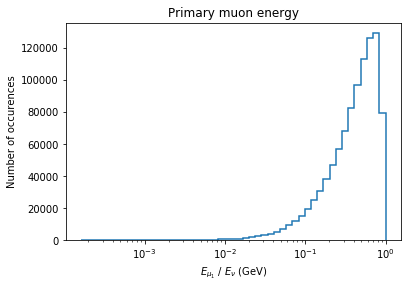

In [5]:
# primary muon energy distribution

ratio_mu1_nu = energy_mu1 / energy_nu

mu1_bins = np.logspace(np.log10(ratio_mu1_nu.min()),
                       np.log10(ratio_mu1_nu.max()),
                       num=50)

plt.hist(ratio_mu1_nu, bins=mu1_bins, histtype='step',
         linewidth=1.5)
plt.xscale('log')
plt.xlabel(r'$E_{\mu_1}$ / $E_\nu$ (GeV)')
plt.ylabel('Number of occurences')
plt.title('Primary muon energy')
plt.show();

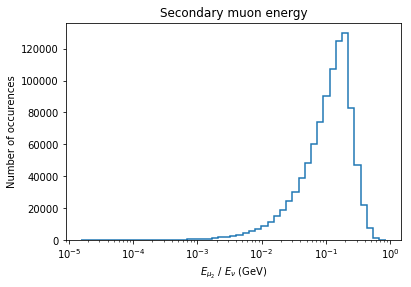

In [6]:
# secondary muon energy distribution

ratio_mu2_nu = energy_mu2 / energy_nu

mu2_bins = np.logspace(np.log10(ratio_mu2_nu.min()),
                       np.log10(ratio_mu2_nu.max()),
                       num=50)

plt.hist(ratio_mu2_nu, bins=mu2_bins, histtype='step',
         linewidth=1.5)
plt.xscale('log')
plt.xlabel(r'$E_{\mu_2}$ / $E_\nu$ (GeV)')
plt.ylabel('Number of occurences')
plt.title('Secondary muon energy')
plt.show();

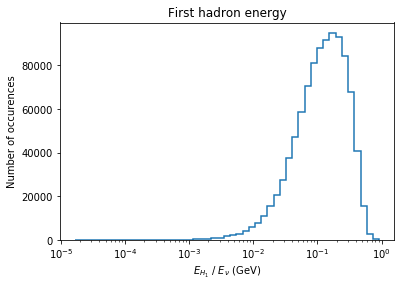

In [7]:
# first hadron energy distribution

ratio_h1_nu = energy_h1 / energy_nu

pos_ratio_h1_nu = ratio_h1_nu[ratio_h1_nu > 0]

h1_bins = np.logspace(np.log10(pos_ratio_h1_nu.min()),
                      np.log10(pos_ratio_h1_nu.max()),
                      num=50)

plt.hist(pos_ratio_h1_nu, bins=h1_bins, histtype='step',
         linewidth=1.5)
plt.xscale('log')
plt.xlabel(r'$E_{H_1}$ / $E_\nu$ (GeV)')
plt.ylabel('Number of occurences')
plt.title('First hadron energy')
plt.show();

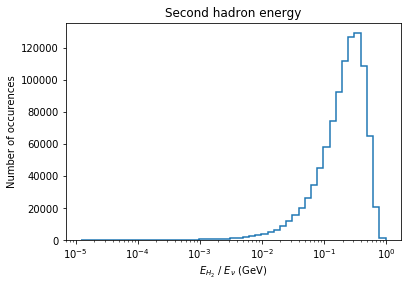

In [8]:
# second hadron energy distribution

ratio_h2_nu = energy_h2 / energy_nu

pos_ratio_h2_nu = ratio_h2_nu[ratio_h2_nu > 0]

h2_bins = np.logspace(np.log10(pos_ratio_h2_nu.min()),
                      np.log10(pos_ratio_h2_nu.max()),
                      num=50)

plt.hist(pos_ratio_h2_nu, bins=h2_bins, histtype='step',
         linewidth=1.5)
plt.xscale('log')
plt.xlabel(r'$E_{H_2}$ / $E_\nu$ (GeV)')
plt.ylabel('Number of occurences')
plt.title('Second hadron energy')
plt.show();

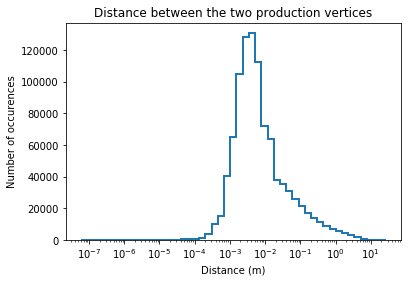

In [9]:
# distance between the two production vertices

mu_bins = np.logspace(np.log10(distance_mu2.min()),
                      np.log10(distance_mu2.max()),
                      num=50)

plt.hist(distance_mu2, bins=mu_bins, histtype='step', linewidth=2)
plt.xscale('log')
plt.xlabel('Distance (m)')
plt.ylabel('Number of occurences')
plt.title('Distance between the two production vertices')
plt.show();

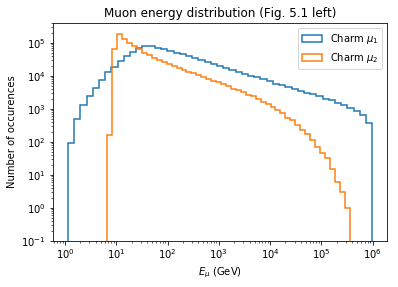

In [10]:
# graph 5.1a

mu1_bins = np.logspace(np.log10(energy_mu1.min()),
                       np.log10(energy_mu1.max()),
                       num=50)

mu2_bins = np.logspace(np.log10(energy_mu2.min()),
                       np.log10(energy_mu2.max()),
                       num=50)

plt.hist(energy_mu1, bins=mu1_bins, histtype='step', log=True,
         label='Charm $\mu_1$', linewidth=1.5)

plt.hist(energy_mu2, bins=mu2_bins, histtype='step', log=True,
         label='Charm $\mu_2$', linewidth=1.5)

plt.xscale('log')
plt.xlabel(r'$E_\mu$ (GeV)')
plt.ylabel('Number of occurences')
plt.title('Muon energy distribution (Fig. 5.1 left)')
plt.legend()
plt.show();

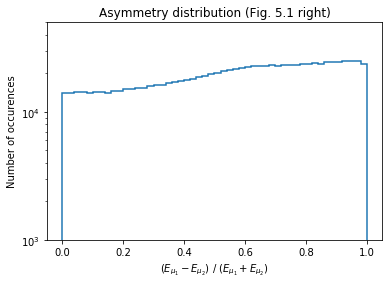

In [59]:
# graph 5.1b

assymmetry = abs((energy_mu1 - energy_mu2) / (energy_mu1 + energy_mu2))

plt.hist(assymmetry, bins=50, histtype='step', log=True,
         linewidth=1.5)
plt.yscale('log')
plt.ylim(10**3, 5*10**4)
plt.xlabel(r'$(E_{\mu_1} - E_{\mu_2})$ / $(E_{\mu_1} + E_{\mu_2})$')
plt.ylabel('Number of occurences')
plt.title('Asymmetry distribution (Fig. 5.1 right)')
plt.show();

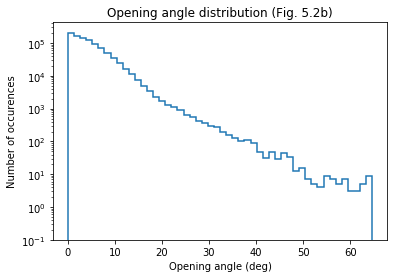

In [14]:
# opening angle between the two muons (graph 5.2b)

x_mu1 = np.sin(theta_mu1) * np.cos(phi_mu1)
y_mu1 = np.sin(theta_mu1) * np.sin(phi_mu1)
z_mu1 = np.cos(theta_mu1)

x_mu2 = np.sin(theta_mu2) * np.cos(phi_mu2)
y_mu2 = np.sin(theta_mu2) * np.sin(phi_mu2)
z_mu2 = np.cos(theta_mu2)

dot_product = x_mu1 * x_mu2 + y_mu1 * y_mu2 + z_mu1 * z_mu2

mag_mu1 = np.sqrt(x_mu1**2 + y_mu1**2 + z_mu1**2)
mag_mu2 = np.sqrt(x_mu2**2 + y_mu2**2 + z_mu2**2)

op_angle_rad = np.arccos(dot_product / (mag_mu1 * mag_mu2))
op_angle = np.degrees(op_angle_rad)

plt.hist(op_angle, bins=50, histtype='step', log=True,
         linewidth=1.5)
plt.yscale('log')
plt.xlabel('Opening angle (deg)')
plt.ylabel('Number of occurences')
plt.title('Opening angle distribution (Fig. 5.2b)')
plt.show();

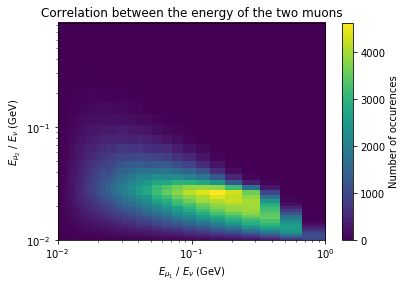

In [16]:
# correlation between the energy of the two muons

ratio_mu1_nu = energy_mu1 / energy_nu
ratio_mu2_nu = energy_mu2 / energy_nu

mu1_bins = np.logspace(np.log10(10**-2),
                       np.log10(ratio_mu1_nu.max()),
                       num=50)
mu2_bins = np.logspace(np.log10(10**-2),
                       np.log10(ratio_mu2_nu.max()),
                       num=50)

plt.hist2d(ratio_mu1_nu, ratio_mu2_nu, bins=[mu1_bins, mu2_bins])
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$E_{\mu_1}$ / $E_\nu$ (GeV)')
plt.ylabel(r'$E_{\mu_2}$ / $E_\nu$ (GeV)')
plt.title('Correlation between the energy of the two muons')
plt.colorbar(label='Number of occurences')
plt.show();

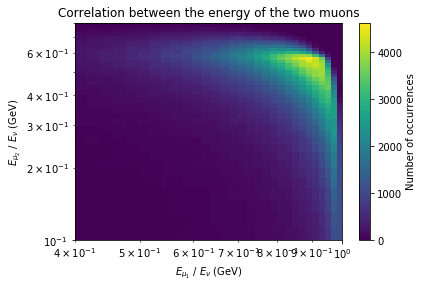

In [58]:
# correlation between the energy of the two muons

ratio_mu1_nu = energy_mu1 / energy_nu
ratio_mu2_nu = energy_mu2 / energy_nu

mu1_bins = np.logspace(np.log10(10**-2),
                       np.log10(ratio_mu1_nu.max()),
                       num=50)
mu2_bins = np.logspace(np.log10(10**-2),
                       np.log10(ratio_mu2_nu.max()),
                       num=50)

hist, x_edges, y_edges = np.histogram2d(ratio_mu1_nu, ratio_mu2_nu, bins=[mu1_bins, mu2_bins])
extent = [x_edges[0], x_edges[-1], y_edges[0], y_edges[-1]]

plt.imshow(hist.T, origin='lower', extent=extent,
           aspect='auto', cmap='viridis')

plt.xscale('log')
plt.yscale('log')
plt.xlim(0.4, 1)
plt.ylim(0.1, 0.8)

plt.xlabel(r'$E_{\mu_1}$ / $E_\nu$ (GeV)')
plt.ylabel(r'$E_{\mu_2}$ / $E_\nu$ (GeV)')
plt.title('Correlation between the energy of the two muons')
plt.colorbar(label='Number of occurrences')

plt.show();

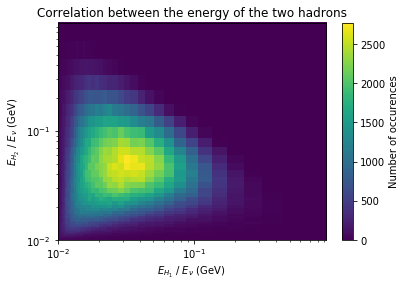

In [17]:
# correlation between the energy of the two hadrons

ratio_h1_nu = energy_h1 / energy_nu
ratio_h2_nu = energy_h2 / energy_nu

h1_bins = np.logspace(np.log10(10**-2),
                      np.log10(ratio_h1_nu.max()),
                      num=50)
h2_bins = np.logspace(np.log10(10**-2),
                      np.log10(ratio_h2_nu.max()),
                      num=50)

plt.hist2d(ratio_h1_nu, ratio_h2_nu, bins=[h1_bins, h2_bins])
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$E_{H_1}$ / $E_\nu$ (GeV)')
plt.ylabel(r'$E_{H_2}$ / $E_\nu$ (GeV)')
plt.title('Correlation between the energy of the two hadrons')
plt.colorbar(label='Number of occurences')
plt.show();